<h1 style="background-color: lightblue; color: darkblue; padding: 10px; text-align: center; border-radius: 8px; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold;"> TikTok Project Exploratory Data  Analysis</h1>

# <span style="color:darkblue; font-size:30px;"><b>Introduction</b></span>

In this activity, we will examine data provided and prepare it for analysis. We will also design a professional data visualization that tells a story and will help data-driven decisions for business needs.
The purpose of this project is to conduct exploratory data analysis on a provided data set. Of particular interest is information related to what distinguishes claim videos from opinion videos.
The goal is to explore the dataset and create visualizations.

This activity has 4 parts:
* Part 1: Imports, links, and loading

* Part 2: Data Exploration

   * Data cleaning
   

* Part 3: Build visualizations

* Part 4: Evaluate and share results


<span style="background-color:deepskyblue;
             color:yellow;
             font-size:25px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
             border:2px solid yellow;
              padding:15px 30px;">Imports
</span>



In [1]:
# Importing  packages for data manipulation and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [12, 5] 

In [3]:
# Loading dataset
data = pd.read_csv("../data/tiktok_dataset.csv")

In [3]:
# Displaying  and examining the first five rows of the dataframe
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Getting the size of the data
data.size

232584

In [5]:
# Getting the shape of the data
data.shape

(19382, 12)

In [6]:
# Getting basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
#  Describing descriptive statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [8]:
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

The dataset contains 12 features and 19,382 rows. The feature data types include Int64, object, and float64. The dataset also contains missing values.
***

<span style="background-color:deepskyblue;
             color:yellow;
             font-size:25px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
             border:2px solid yellow;
              padding:15px 30px;">Understand the data - Investigate the variables
</span>

In [9]:
# What are the different values for claim status and how many of each are in the data?
data['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

In [10]:
# What is the average view count of videos with "claim" status?
claims = data[data['claim_status'] == 'claim']
print('Mean view count claims:', claims['video_view_count'].mean())
print('Median view count claims:', claims['video_view_count'].median())

Mean view count claims: 501029.4527477102
Median view count claims: 501555.0


In [11]:
# What is the average view count of videos with "opinion" status?
opinions = data[data['claim_status'] == 'opinion']
print('Mean view count opinions:', opinions['video_view_count'].mean())
print('Median view count opinions:', opinions['video_view_count'].median())

Mean view count opinions: 4956.43224989447
Median view count opinions: 4953.0


The mean and the median within each claim category are close to one another, but there is a vast discrepancy between view counts for videos labeled as claims and videos labeled as opinions.

Now, examine trends associated with the ban status of the author.

Use `groupby()` to calculate how many videos there are for each combination of categories of claim status and author ban status

In [12]:
# Getting counts for each group combination of claim status and author ban status
data.groupby(['claim_status', 'author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

There are significantly more claim videos with banned authors compared to opinion videos with banned authors. This could suggest several possibilities:

* Claim videos might be more strictly regulated than opinion videos.

* Authors might need to adhere to stricter rules when posting claim videos compared to opinion videos.

It's important to note that we cannot determine if claim videos are inherently more likely to lead to author bans or if authors who post claim videos are more likely to violate terms of service.

Additionally, while this data allows us to draw conclusions about banned versus active authors, we cannot make conclusions about banned videos. There is no way to determine if a specific video caused the ban, and banned authors might have posted videos that complied with the terms of service.

Next, we will investigate engagement levels, focusing on `author_ban_status`.
We will calculate the median video share count for each author ban status.
***

In [13]:
data.groupby(['author_ban_status']).agg(
    {'video_view_count': ['mean', 'median'],
     'video_like_count': ['mean', 'median'],
     'video_share_count': ['mean', 'median']})

video_view_count           video_like_count            \
                              mean    median             mean    median   
author_ban_status                                                         
active               215927.039524    8616.0     71036.533836    2222.0   
banned               445845.439144  448201.0    153017.236697  105573.0   
under review         392204.836399  365245.5    128718.050339   71204.5   

                  video_share_count           
                               mean   median  
author_ban_status                             
active                 14111.466164    437.0  
banned                 29998.942508  14468.0  
under review           25774.696999   9444.0

In [14]:
# What's the median video share count of each author ban status?

data.groupby(['author_ban_status']).median(numeric_only=True)[
    ['video_share_count']]

,video_share_count
author_ban_status,
active,437.0
banned,14468.0
under review,9444.0


Banned authors have a median share count that's 33 times the median share count of active authors! Explore this in more depth.

Use `groupby()` to group the data by `author_ban_status`, then use `agg()` to get the count, mean, and median of each of the following columns:
* `video_view_count`
* `video_like_count`
* `video_share_count`

Remember, the argument for the `agg()` function is a dictionary whose keys are columns. The values for each column are a list of the calculations you want to perform.

In [15]:
data.groupby(['author_ban_status']).agg(
    {'video_view_count': ['count', 'mean', 'median'],
     'video_like_count': ['count', 'mean', 'median'],
     'video_share_count': ['count', 'mean', 'median']
     })

video_view_count                          video_like_count  \
                             count           mean    median            count   
author_ban_status                                                              
active                       15383  215927.039524    8616.0            15383   
banned                        1635  445845.439144  448201.0             1635   
under review                  2066  392204.836399  365245.5             2066   

                                           video_share_count                \
                            mean    median             count          mean   
author_ban_status                                                            
active              71036.533836    2222.0             15383  14111.466164   
banned             153017.236697  105573.0              1635  29998.942508   
under review       128718.050339   71204.5              2066  25774.696999   

                            
                    median  
author_ban_status           
active               437.0  
banned             14468.0  
under review        9444.0

A few observations stand out:
* Banned authors and those under review get far more views, likes, and shares than active authors.
* In most groups, the mean is much greater than the median, which indicates that there are some videos with very high engagement counts.

Now, create three new columns to help better understand engagement rates:
* `likes_per_view`: represents the number of likes divided by the number of views for each video
* `comments_per_view`: represents the number of comments divided by the number of views for each video
* `shares_per_view`: represents the number of shares divided by the number of views for each video

In [16]:
# Creating a likes_per_view column
data['likes_per_view'] = data['video_like_count'] / data['video_view_count']

# Creating a comments_per_view column
data['comments_per_view'] = data['video_comment_count'] / data['video_view_count']

# Creating a shares_per_view column
data['shares_per_view'] = data['video_share_count'] / data['video_view_count']

We use `groupby()` to compile the information in each of the three newly created columns for each combination of categories of claim status and author ban status, then use `agg()` to calculate the count, the mean, and the median of each group

In [17]:
data.groupby(['claim_status', 'author_ban_status']).agg(
    {'likes_per_view': ['count', 'mean', 'median'],
     'comments_per_view': ['count', 'mean', 'median'],
     'shares_per_view': ['count', 'mean', 'median']})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

<span style="background-color:deepskyblue;
             color:yellow;
             font-size:25px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
             border:2px solid yellow;
              padding:15px 30px;">Visualisations
</span>

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

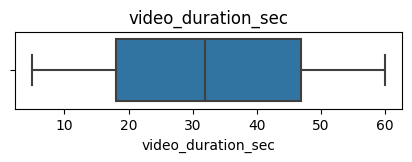

In [18]:
# Creating a boxplot to visualise distribution of `video_duration_sec`
plt.figure(figsize=(5,1))
plt.title('video_duration_sec')
sns.boxplot(x=data['video_duration_sec']);

***
Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

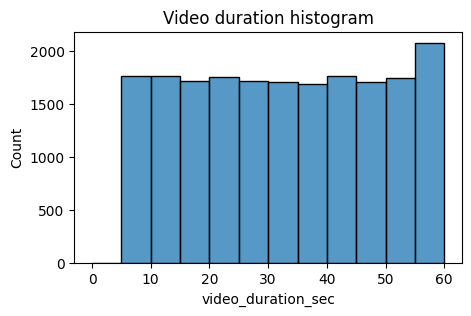

In [19]:
#Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable
plt.figure(figsize=(5,3))
sns.histplot(data['video_duration_sec'], bins=range(0,61,5))
plt.title('Video duration histogram');

All videos are **5-60 seconds** in length, and the distribution is uniform.
***

#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

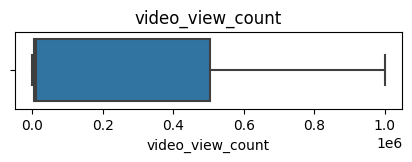

In [20]:
# Creating a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(5, 1))
plt.title('video_view_count')
sns.boxplot(x=data['video_view_count']);

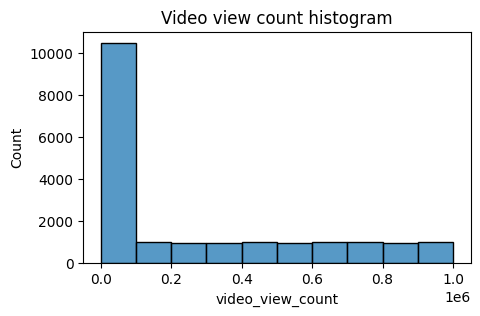

In [21]:
#Creating a histogram of the values in the `video_view_count` column to further explore the distribution.
plt.figure(figsize=(5,3))
sns.histplot(data['video_view_count'], bins=range(0,(10**6+1),10**5))
plt.title('Video view count histogram');

This variable has a very uneven distribution, with more than half the videos receiving fewer than **100,000** views. Distribution of view counts **> 100,000 views** is uniform.

#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

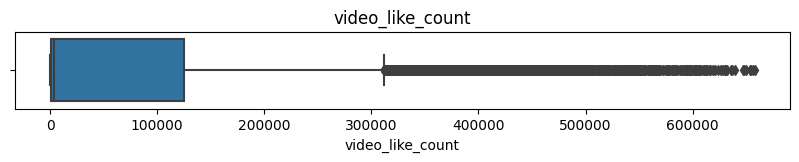

In [22]:
# Creating a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(10,1))
plt.title('video_like_count')
sns.boxplot(x=data['video_like_count']);

##### Creating a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

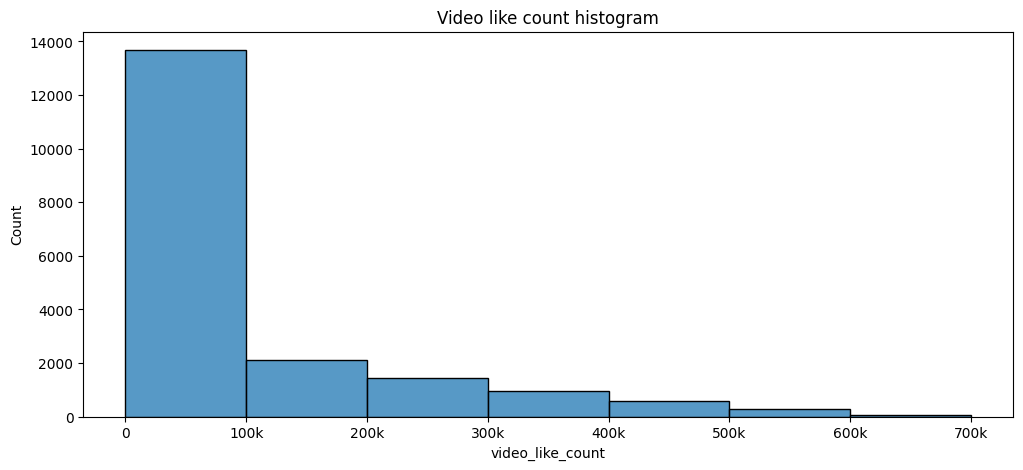

In [23]:
# plt.figure(figsize=(5,3))
ax = sns.histplot(data['video_like_count'], bins=range(0,(7*10**5+1),10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0,7*10**5+1,10**5), labels=labels)
plt.title('Video like count histogram');

Similar to `view count`, there are far more videos with **< 100,000** likes than there are videos with more. However, in this case, there is more of a taper, as the data skews right, with many videos at the upper extremity of like count.
***

#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

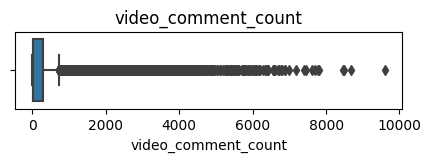

In [24]:
# Creating a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(5,1))
plt.title('video_comment_count')
sns.boxplot(x=data['video_comment_count']);

***
##### Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

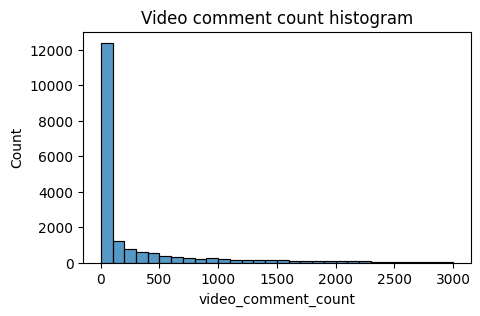

In [25]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_comment_count'], bins=range(0,(3001),100))
plt.title('Video comment count histogram');

The vast majority of videos are grouped at the bottom of the range of values for video comment count. Most videos have fewer than **100 comments**. The distribution is very right-skewed.

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column

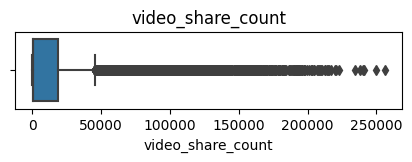

In [26]:
# Creating a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(5,1))
plt.title('video_share_count')
sns.boxplot(x=data['video_share_count']);

***
##### Create a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

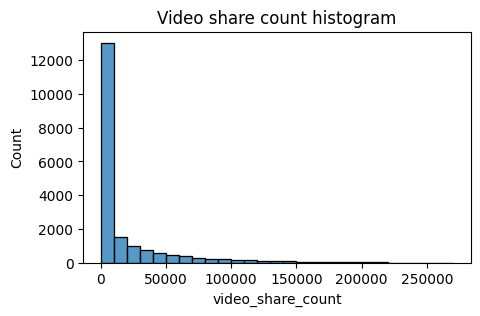

In [27]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_share_count'], bins=range(0,(270001),10000))
plt.title('Video share count histogram');

The overwhelming majority of videos had fewer than **10,000 shares**. The distribution is very skewed to the right.

#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

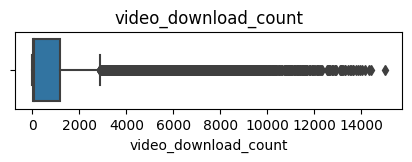

In [28]:
# Creating a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(5,1))
plt.title('video_download_count')
sns.boxplot(x=data['video_download_count']);

***

##### Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

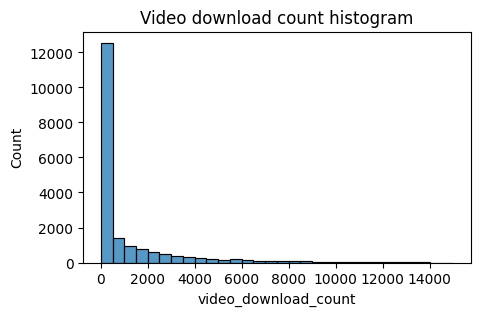

In [29]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_download_count'], bins=range(0,(15001),500))
plt.title('Video download count histogram');

The majority of videos were downloaded fewer than **500 times**, but some were downloaded over **12,000 times**. Again, the data is very skewed to the right.

#### **Claim status by verification status**

Now, we create a histogram with four bars: one for each combination of claim status and verification status.

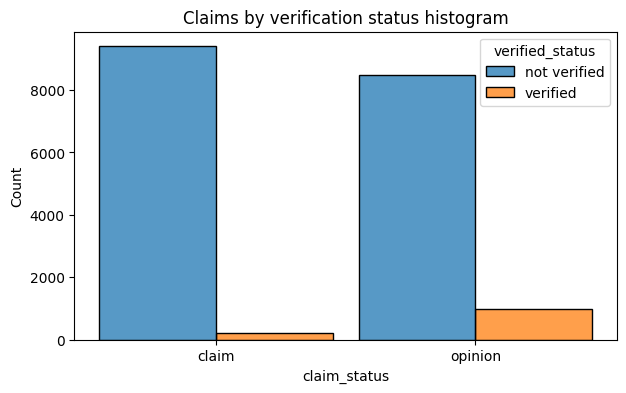

In [30]:
plt.figure(figsize=(7,4))
sns.histplot(data=data,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram');

There are far fewer verified users than unverified users, but if a user is verified, they are much more likely to post opinions.
***

#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

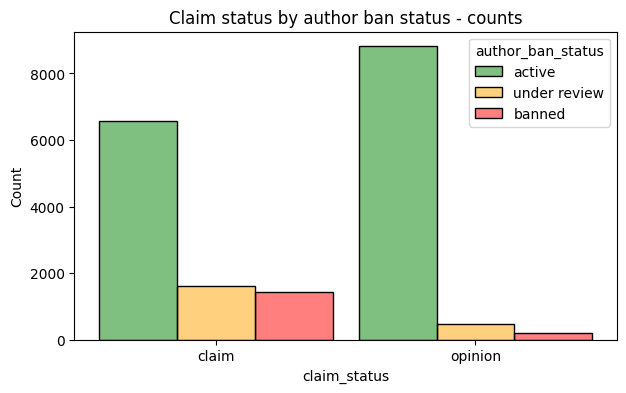

In [31]:
fig = plt.figure(figsize=(7,4))
sns.histplot(data, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts');

For both claims and opinions, there are many more active authors than banned authors or authors under review; however, the proportion of active authors is far greater for opinion videos than for claim videos. Again, it seems that authors who post claim videos are more likely to come under review and/or get banned.
***

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

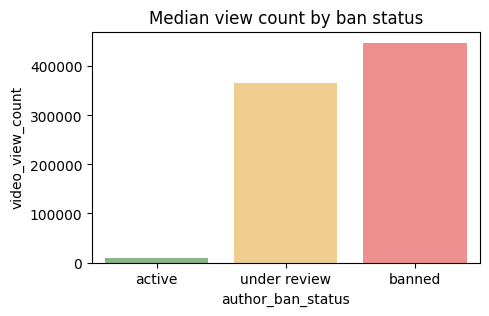

In [32]:
ban_status_counts = data.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
plt.title('Median view count by ban status');

The median view counts for non-active authors are many times greater than the median view count for active authors. Since you know that non-active authors are more likely to post claims, and that videos by non-active authors get far more views on aggregate than videos by active authors, then video_view_count might be a good indicator of claim status.

Indeed, a quick check of the median view count by claim status bears out this assessment:
***

In [33]:
data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

#### **Total views by claim status**

We create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

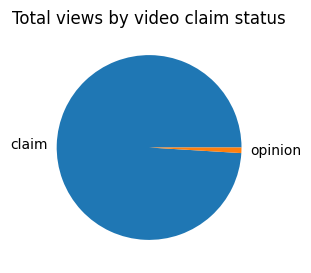

In [34]:
fig = plt.figure(figsize=(3,3))
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status');

The overall view count is dominated by claim videos even though there are roughly the same number of each video in the dataset
***

<span style="background-color:deepskyblue;
             color:yellow;
             font-size:25px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
             border:2px solid yellow;
              padding:15px 30px;">Outlier Detection
    
</span>




When building predictive models, the presence of outliers can be problematic. Outliers can introduce bias and skew results, leading to inaccurate predictions. For example, if you are trying to predict the view count of a video, videos with exceptionally high view counts might distort the model. Additionally, some outliers might indicate issues with data capture or recording errors.

A common method to determine outliers in a normal distribution is to calculate the **interquartile range (IQR)** and set a threshold at **1.5 times the IQR** above the third quartile. To address these issues, we will use this method to detect and handle outliers in our dataset.

In [35]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


#### **Scatterplot**

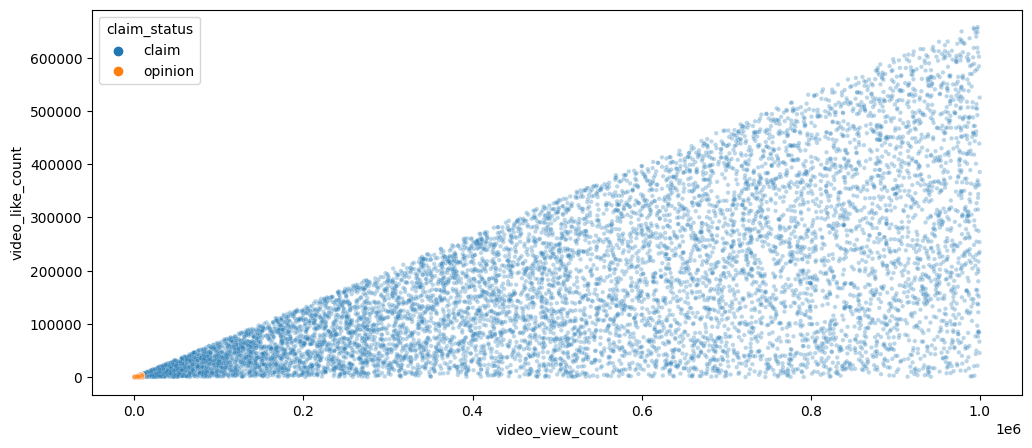

In [36]:
# Creating a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"],
                hue=data["claim_status"], s=10, alpha=.3)
plt.show()

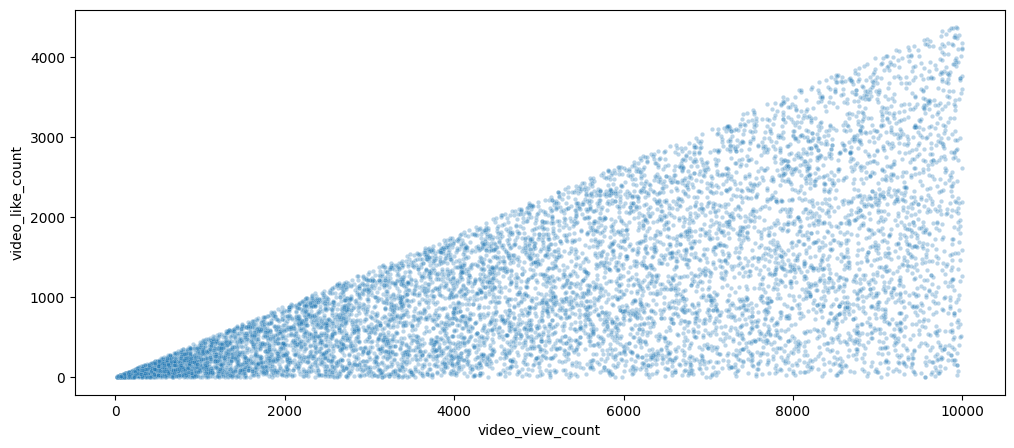

In [37]:
# Creating a scatterplot of `video_view_count` versus `video_like_count` for opinions only
opinion = data[data['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
                 s=10, alpha=.3)
plt.show()